# Part II - (Ford GoBike)
## by (Yenika Djasnive RAJAONA )

## Table des matières
> - <a href="#investigation">Investigation Overview</a>
> - <a href="#dataset">Dataset Overview</a>
> - <a href="#duree">Distribution de la durée des utilisations des velos</a>
> - <a href="#jour">Distribution par jour de la semaine</a>
> - <a href="#heure">Distribution par heure</a>

<span id="investigation"></span>
## Investigation Overview

Dans cette section, nous allons nous interesser sur les distributions de données mes plus intéréssant. Nous allons nous concentrer sur les comportements qui pourraient conduire à l'augmentation du nombre d'utilisateur.



<span id="dataset"></span>
## Dataset Overview

Les données que nous allons utiliser sont les extraits du Dataset **Ford GoBike** déjà nettoyés dans la section précédente. Cependant, nous n'allons retenir que les colonnes qui nous sont nésseraire lors de cette présentation.

Les colonnes que nous allons garder sont:
- **duration_sec** : La durée de l'utilisation d'un velo
- **day_name** : Jour de la semaine
- **hours** : Heure de l'emprunt
- **user_type** : Type de l'utilisateur
- **member_age** : Age de l'utilisateur

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174880 entries, 0 to 174879
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   duration_sec             174880 non-null  int64 
 1   start_time               174880 non-null  object
 2   end_time                 174880 non-null  object
 3   start_station_name       174880 non-null  object
 4   end_station_name         174880 non-null  object
 5   bike_id                  174880 non-null  int64 
 6   user_type                174880 non-null  object
 7   member_birth_year        174880 non-null  int64 
 8   member_gender            174880 non-null  object
 9   bike_share_for_all_trip  174880 non-null  object
 10  member_age               174880 non-null  int64 
 11  day_name                 174880 non-null  object
 12  hours                    174880 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 17.3+ MB


In [3]:
# Selection des colonnes utiles
df = df[["duration_sec","user_type","member_age","day_name","hours"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174880 entries, 0 to 174879
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  174880 non-null  int64 
 1   user_type     174880 non-null  object
 2   member_age    174880 non-null  int64 
 3   day_name      174880 non-null  object
 4   hours         174880 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ MB


<span id="duree"></span>
## Distribution de la durée des utilisations des velos

On constate lors de la visualisation de la distribution de la durée de l'utilisation des velos que, plus de 75 pourcents des durée d'utilisation sont inférieurs à **789 secondes**, et la majorité des utilisateurs qui durent sont des personnes entre 25 et 40 ans.

In [4]:
df.duration_sec.describe()

count    174880.000000
mean        704.022358
std        1642.514884
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

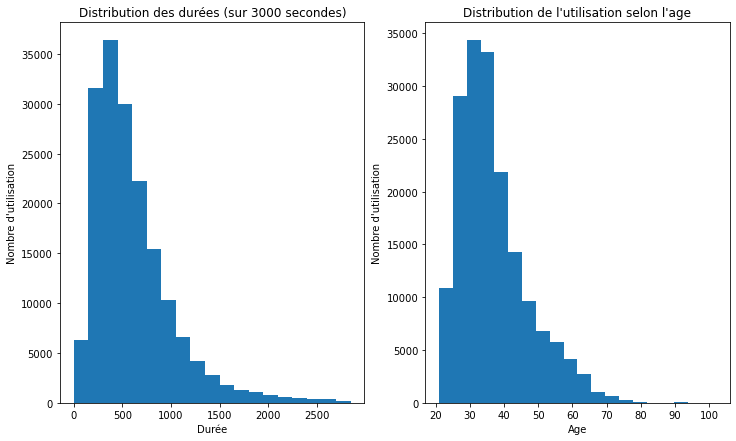

In [5]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,7))
bins = np.arange(0, 3000,150 )
ax[0].hist(data=df, x='duration_sec',bins=bins)
ax[0].set_title(f"Distribution des durées (sur {3000} secondes)")
ax[0].set_xlabel("Durée")
ax[0].set_ylabel("Nombre d'utilisation")

ax[1].hist(data=df, x='member_age',bins=int(df.member_age.max()/5)) # On veut voir les variations pour chaque 5 ans
ax[1].set_title("Distribution de l'utilisation selon l'age")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Nombre d'utilisation")


plt.show()


<span id="jour"></span>
## Distribution par jour de la semaine

Il est nécéssaire de connaître les facteurs qui entraîne l'utilisation des velos si l'on veut augmenter le nombre d'utilisation. Une des faits que l'on a pu constater jusqu'à présent c'est le fait que l'utilisation des velos sont plus nombreux les **weekdays** que les **weekends**. Cela est peut-etre dû au fait que la majorité de l'utilisation des velos c'est pour **se rendre au travail**.

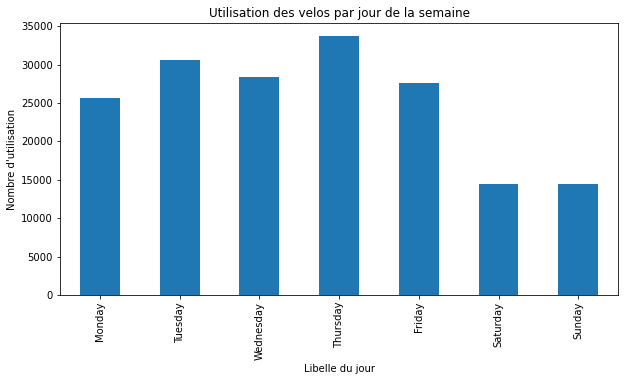

In [6]:
# Definir un ordre
jours = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'];
plt.figure(figsize=(10,5))
df.day_name.value_counts()[jours].plot(kind='bar')
plt.title("Utilisation des velos par jour de la semaine")
plt.xlabel("Libelle du jour")
plt.ylabel("Nombre d'utilisation")
plt.show()

<span id="heure"></span>
## Distribution par heure

La distribution de l'utilisation des velos par heure nous montre que il y a une sur-utilisation des velos à **8h** et à **17h**. Ces heures correspondent aux **heures de pointe**.<br>
Cela ne fait que renforcer de plus en plus notre hypothèse qui dit que ces velos sont très utilisés pour se rendre aux travails.

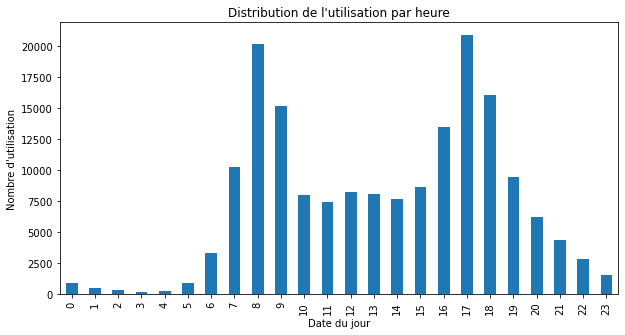

In [7]:
data = df.hours.value_counts().sort_index()
jours = data.index
plt.figure(figsize=(10,5))
data.plot(kind='bar')
plt.title("Distribution de l'utilisation par heure")
plt.xlabel("Date du jour")
plt.ylabel("Nombre d'utilisation")
plt.show()